In [10]:
import pandas as pd
import numpy as np
import surprise

Surprise installation : 

In [9]:
conda install -c conda-forge scikit-surprise

Solving environment: done

## Package Plan ##

  environment location: /home/zuzanna/anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38h578d9bd_0         3.1 MB  conda-forge
    scikit-surprise-1.1.1      |   py38hab2c0dc_1         626 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  scikit-surprise    conda-forge/linux-64::scikit-surprise-1.1.1-py38hab2c0dc_1

The following packages will be UPDATED:

  conda                               4.10.0-py38h578d9bd_1 --> 4.10.1-py38h578d9bd_0



scikit-surprise-1.1. | 626 KB    | ##################################### | 100% 
conda-4.10.1         | 3.1 MB    | ##################################### | 100% 
Prep

Reading data :

In [98]:
books = pd.read_csv('./goodbooks-10k-1.0/books.csv')
ratings = pd.read_csv('./goodbooks-10k-1.0/ratings.csv')

In [12]:
books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
ratings.head(5)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Chcecking if there are any outliers :

In [115]:
def check_outliers(data, col_name):
    data_grouped = data.groupby(col_name).size()
    data_grouped.hist()
    print(data_grouped.sort_values().head(50))
    print(f'Mean value is {data_grouped.mean()}')
    return data_grouped
    

book_id
1935    33
9315    36
9553    41
8181    45
9260    48
9479    48
9705    50
9249    52
9918    52
9904    53
9307    53
9769    54
8368    54
8971    54
8999    55
8601    57
8147    57
6991    57
9534    57
8259    58
9529    59
8297    59
8964    59
9980    59
7636    60
9248    60
6819    60
9374    60
8372    61
7200    61
6463    61
8052    61
9762    61
9548    61
8831    61
8423    63
9347    63
8948    63
9903    63
9032    63
7191    63
8812    64
8616    64
6543    64
5788    64
9228    65
8341    65
9986    65
7881    65
8684    65
dtype: int64
Mean value is 597.8229468840652


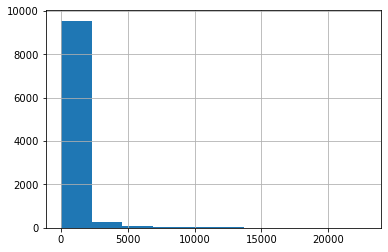

In [116]:
grouped_books = check_outliers(ratings,'book_id')

We can see that some books have only a few ratings. Let's remove from our dataset books with less than 30 reviews.

In [112]:
more_than_30 = list(grouped_books[grouped_books>=30].index)
print(len(more_than_30))
ratings = ratings[ratings.book_id.isin(more_than_30)]

9997


How about users?

user_id
34590    19
43675    20
40753    21
32128    21
51725    21
25258    22
16470    22
25856    22
22020    22
38280    22
37640    22
32960    22
50918    22
40299    22
43672    22
48077    22
34099    22
42736    22
39865    23
18327    23
13782    23
47143    23
40212    23
12570    24
26468    24
13037    24
31931    24
49880    24
32925    24
14108    24
43447    24
45407    24
40047    24
43848    24
44792    25
35772    25
38944    25
43161    25
52083    25
50814    25
46539    25
51174    25
22286    25
33711    25
50743    25
48365    25
20995    25
30348    26
16583    26
11834    26
dtype: int64
Mean value is 111.86799940101827


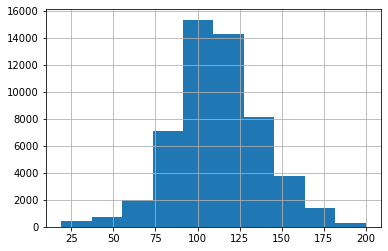

In [117]:
grouped_users = check_outliers(ratings,'user_id')

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5
